# [Quality Minus Junk](https://www.aqr.com/Insights/Datasets/Quality-Minus-Junk-Factors-Monthly)
A strategy from AQR Capital Management that goes long in safe, profitable, growing and well-managed stocks while goes short in stocks with the opposite characteristics. 
Below is the derivation for the maximum drawdowns of the QMJ monthly portfolios. (1957-2019)

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
# Path should be modified according to file path on your computer
path ='/Users/haochen/Downloads/Alternative Investment Strategies/Quality Minus Junk 10 QualitySorted Portfolios Monthly.xlsx'

df = pd.read_excel(path, sheet_name='Sheet2', header=0, index_col=0, parse_dates=True)

df.head()

,P1 (low quality),P2,P3,P4,P5,P6,P7,P8,P9,P10 (high quality),...,P2.1,P3.1,P4.1,P5.1,P6.1,P7.1,P8.1,P9.1,P10 (high quality).1,P10-P1.2
DATE,,,,,,,,,,,,,,,,,,,,,
1957-07-31,-0.005017,0.016438,-0.001863,0.004807,-0.005883,0.017322,0.001817,0.017136,0.014402,0.017519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-08-31,-0.037498,-0.034978,-0.066123,-0.075569,-0.016631,-0.055152,-0.060160,-0.050194,-0.052107,-0.056645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-09-30,-0.052741,-0.042106,-0.062913,-0.068924,-0.042417,-0.073249,-0.075578,-0.015640,-0.065713,-0.052810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-10-31,-0.030079,-0.036808,-0.033168,-0.063987,-0.034294,-0.041036,-0.037275,-0.043252,-0.042036,-0.017737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-11-30,0.049104,0.048572,0.056684,0.043276,0.049264,0.000825,-0.003886,0.016266,0.038895,0.038904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
# Rename column names to avoid confusion
print(list(df.columns))

col_rename = ['P1 (low quality)', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10 (high quality)', 'P10-P1', 'P1_cumu', 'P10_cumu', 'P10-P1_cumu', 
          'P1 (low quality).1', 'P2.1', 'P3.1', 'P4.1', 'P5.1', 'P6.1', 'P7.1', 'P8.1', 'P9.1', 'P10 (high quality).1', 'P10.1-P1.1_cumu']

df = df.reindex(col_rename, axis=1)
print(list(df.columns))

['P1 (low quality)', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10 (high quality)', 'P10-P1', 'P1', 'P10', 'P10-P1.1', 'P1 (low quality).1', 'P2.1', 'P3.1', 'P4.1', 'P5.1', 'P6.1', 'P7.1', 'P8.1', 'P9.1', 'P10 (high quality).1', 'P10-P1.2']
['P1 (low quality)', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10 (high quality)', 'P10-P1', 'P1_cumu', 'P10_cumu', 'P10-P1_cumu', 'P1 (low quality).1', 'P2.1', 'P3.1', 'P4.1', 'P5.1', 'P6.1', 'P7.1', 'P8.1', 'P9.1', 'P10 (high quality).1', 'P10.1-P1.1_cumu']


In [282]:
# Checking column names
df.iloc[:,:14].head()

,P1 (low quality),P2,P3,P4,P5,P6,P7,P8,P9,P10 (high quality),P10-P1,P1_cumu,P10_cumu,P10-P1_cumu
DATE,,,,,,,,,,,,,,
1957-07-31,-0.005017,0.016438,-0.001863,0.004807,-0.005883,0.017322,0.001817,0.017136,0.014402,0.017519,0.022535,NaN,NaN,NaN
1957-08-31,-0.037498,-0.034978,-0.066123,-0.075569,-0.016631,-0.055152,-0.060160,-0.050194,-0.052107,-0.056645,-0.019147,NaN,NaN,NaN
1957-09-30,-0.052741,-0.042106,-0.062913,-0.068924,-0.042417,-0.073249,-0.075578,-0.015640,-0.065713,-0.052810,-0.000070,NaN,NaN,NaN
1957-10-31,-0.030079,-0.036808,-0.033168,-0.063987,-0.034294,-0.041036,-0.037275,-0.043252,-0.042036,-0.017737,0.012341,NaN,NaN,NaN
1957-11-30,0.049104,0.048572,0.056684,0.043276,0.049264,0.000825,-0.003886,0.016266,0.038895,0.038904,-0.010200,NaN,NaN,NaN


In [283]:
# Caculating cumu returns (Net Asset Values)
def cumulative(dframe, col_a, col_b):
    
    index_a = list(dframe.columns).index(col_a)
    index_b = list(dframe.columns).index(col_b)
    
    for i in range(0,len(dframe)):
        if ((dframe.iloc[i, index_a] == np.nan ) or (dframe.iloc[i, index_b] == np.nan) ):
            continue
        if ((i ==0) or (dframe.iloc[i-1, index_a] == np.nan)):
            dframe.iloc[0, index_b] = 1*(1+dframe.iloc[0, index_a])
        else:
            dframe.iloc[i, index_b] = dframe.iloc[i-1, index_b] * (1+dframe.iloc[i, index_a])

In [284]:
# US sample
cumulative(df, 'P1 (low quality)', 'P1_cumu')
cumulative(df, 'P10 (high quality)', 'P10_cumu')
cumulative(df, 'P10-P1', 'P10-P1_cumu')

# # Global sample: first initiate two columns as cumu returns for P1.1 and P10.1
# df['P1.1_cumu'] = np.nan
# df['P10.1_cumu'] = np.nan
# df['P10.1-P1.1'] = df['P10 (high quality).1'] - df['P1 (low quality).1']

# cumulative(df, 'P1 (low quality).1', 'P1.1_cumu')
# cumulative(df, 'P10 (high quality).1', 'P10.1_cumu')
# cumulative(df, 'P10.1-P1.1', 'P10.1-P1.1_cumu')

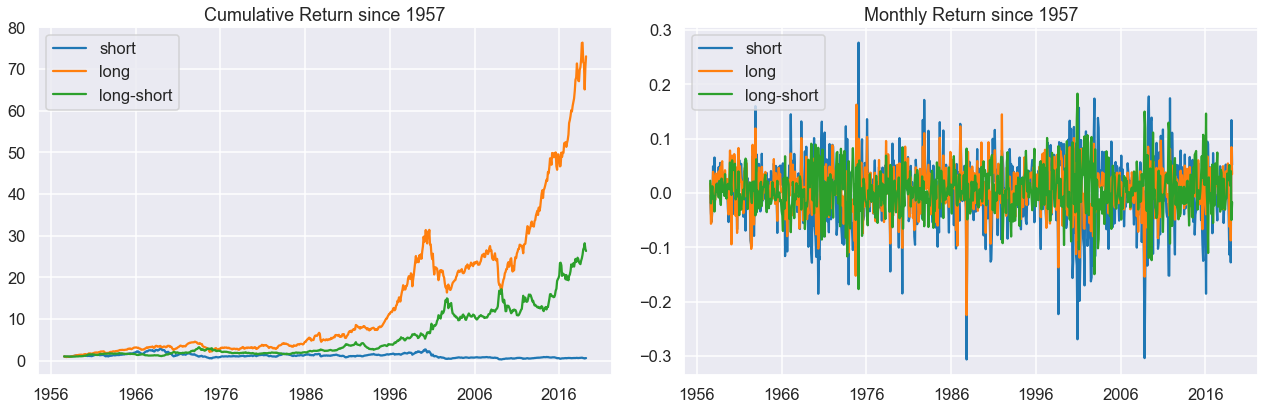

In [285]:
# Plotting cumu returns
fig, axes= plt.subplots(1,2, sharex=True, figsize=[18,6])
axes[0].plot(df[['P1_cumu', 'P10_cumu', 'P10-P1_cumu']])
axes[0].set_title('Cumulative Return since 1957')
axes[0].legend(['short', 'long', 'long-short'])
plt.tight_layout(True)


axes[1].plot(df[['P1 (low quality)', 'P10 (high quality)', 'P10-P1']])
axes[1].set_title('Monthly Return since 1957')
axes[1].legend(['short', 'long', 'long-short'])
plt.tight_layout(True)

# Calculating Maximum Drawdown

In [286]:
# Caculating drawdown
def drawdown(dframe, nav):


    max_cumu = 'Max_'+nav
    drawdown_cumu = 'Drawdown_'+nav
    dframe[max_cumu] = np.nan
    dframe[drawdown_cumu] = np.nan

    for i in range(0,len(dframe)):
        dframe[max_cumu][i] = max( dframe[nav][0:(i+1)] )
        dframe[drawdown_cumu] = dframe[nav] / dframe[max_cumu] - 1
    
    max_drawdown = min(dframe[drawdown_cumu])
    return max_drawdown

In [287]:
drawdowns = pd.DataFrame([[drawdown(df, 'P1_cumu')], [drawdown(df, 'P10_cumu')], [drawdown(df, 'P10-P1_cumu')]], 
                         index=['short', 'long', 'long-short'], columns=['Drawdown'])

# From float to percentage with two decimal points
drawdowns['Drawdown'] = drawdowns['Drawdown'].apply(lambda x: format(x, '.2%'))
drawdowns

,Drawdown
short,-89.97%
long,-54.12%
long-short,-51.76%
